# **Gender Style Transfer**

# **Task**:

To generate variation of images from male to female using pre-trained model.


## **Steps**:

1. Load the pre-trained Generator.
2. Load Gender Vector.
3. Generate 10 variations of the image from male to female.

# **1. Load the Pre-trained Generator**

In [1]:
import requests

url = "https://github.com/AshishJangra27/Face-Generator-with-GAN/raw/main/generator_700.h5"
response = requests.get(url)

with open("generator_700.h5", "wb") as f:
    f.write(response.content)

In [2]:
import tensorflow as tf

generator = tf.keras.models.load_model("generator_700.h5")

# **2. Load Gender Vector**

In [3]:
import requests

url = "https://github.com/AshishJangra27/Gender-Style-Transfer/raw/main/gender_vec.npy"
response = requests.get(url)

with open("gender_vec.npy", "wb") as f:
    f.write(response.content)

In [4]:
import numpy as np

gender_vec = np.load("gender_vec.npy")

# **3. Generate Variation of Images from Male to Female**

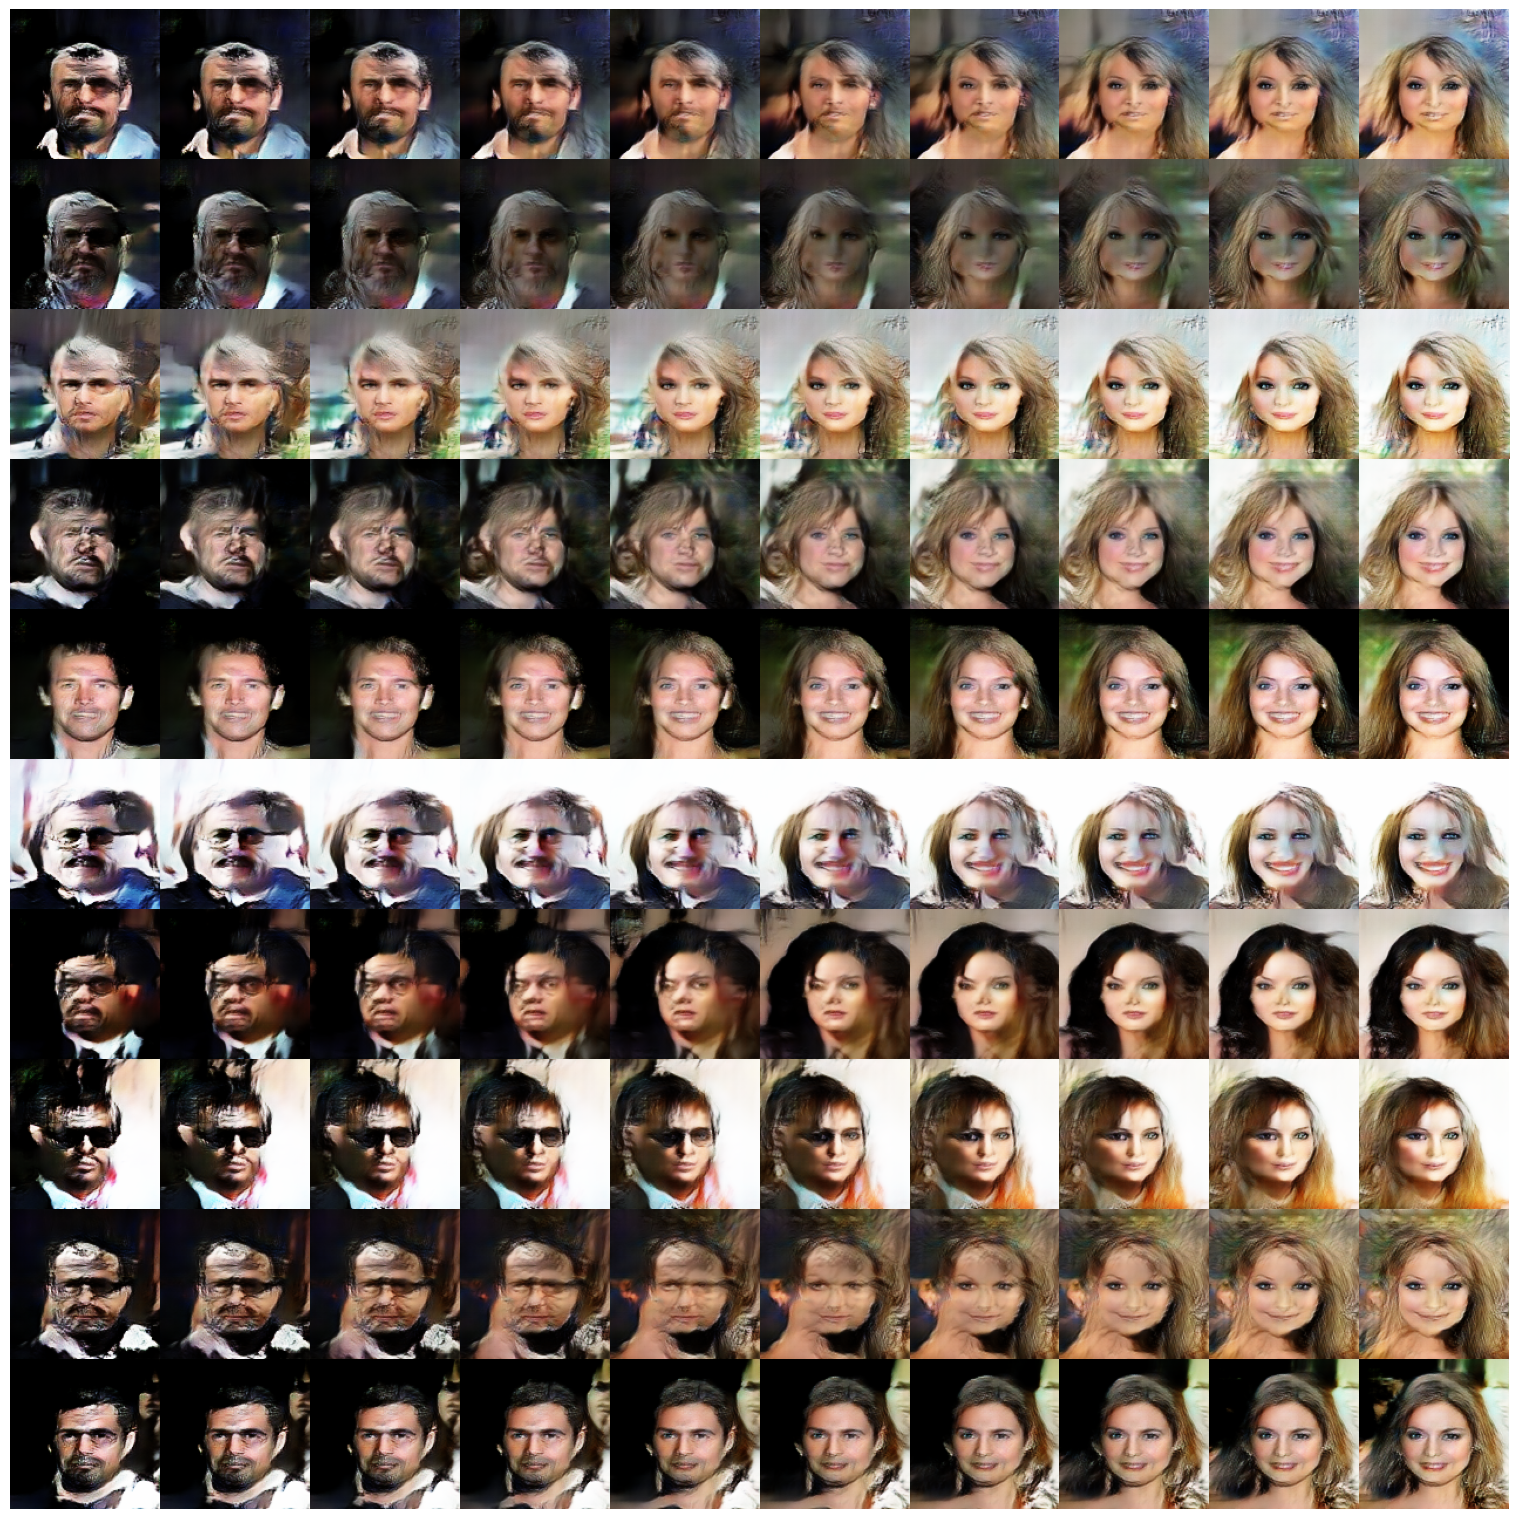

In [12]:
import matplotlib.pyplot as plt

def generate(noise):
    return (generator(noise, training=False) + 1) / 2.0

noises = tf.random.normal([10, 100])
modifications = [2.5, 2, 1.5, 1, 0.5, 0, -0.5, -1, -1.5, -2]

fig, axes = plt.subplots(10, 10, figsize=(15, 15))

for row, noise in enumerate(noises):
    for col, mod in enumerate(modifications):
        axes[row, col].imshow(generate(noise + mod * gender_vec)[0])
        axes[row, col].axis("off")

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout(pad=0)
plt.show()